# Using an OOP-Approach for string citations in GFCC Decisions

Kilian Lüders & Bent Stohlmann

Contact: kilian.lueders@hu-berlin.de


### Abstract
In this short tutorial, we introduce our object-oriented approach to capture string citations of the German Federal Constitutional Court (GFCC). The references have a particular layout for which we have created a custom solution. Here we first show the basic application of our solution and then introduce a concrete case study to show the potentials.

## Problem description
### The reference notation
The GFCC makes very extensive use of self-references. They are virtually ubiquituos to the the court's reasoning and can be considered the court's most used explicit reference. Therefore, self-references are important to an analysis of the courts argumentation. These self-references generally have the following notation:

*BVerfGE 58, 300 [336]*

'BVerfGE' is the name of the official collection of decisions. The first number indicates the volume (58), followed by the first page of the decision (300) and a precise reference to a page (336). The last reference is optional.
These self-references often occur as chain citations, for example, in the following format:

*BVerfGE 25, 112 [114]; 51, 193 [210 f.]; 52, 1 [14]*

In this example, we are dealing with three self-references. These chains of citations, which we will call string citations going forward, are of particular importance for the GFCC. They link different references to earlier decisions together and thereby "bundle" them to support particular statements or arguments. This bundling contains valuable information transcending the information obtained by observing the citations separately. To understand this value one has to consider that while often using self-references in its decisions the GFCC almost never adresses the cited case in text. This stands in stark contrast to for example common law traditions whitin in which their can be lenghty discussions about the applicability of findings from the cited case to the new decision. In making use of string citations, the GFCC gives us a rare piece of information on structure within its approach to its own case law. Against the backdrop of such information being very scarce, the information about which decisions are referred to whithin the same string citation is of great value to the analysis of the GFCC's jurisprudence.

### The task
The court uses the layout described above for self-references very consistently. There is slight variation, but ultimately the rules of notation are quite predictable.
Accordingly, capturing self-references is also feasible with rule-based approaches. There is also research that has done this successfully[¹²].

However, these approaches were quite inaccurate insofar as they lost significant information, such as the exact references or belonging to chain references. The big challenge seemed to be less the extraction of information than the handling of the information.

The approach presented here tries to offer a solution for this problem. The simple means of programming 101 are used to find a customized solution for the string citations of the BVerfGE.

In the following, we will present our approach. It is not particularly sophisticated from the technical point of view. Rather, it is intended to show that very helpful solutions can be created with simple means of prgramming. In this case, it is about the storage and processing of very unique data of self references.

### The solution
The solution technique used is essentially the implementation of an object-oriented approach. Thereby, dedicated classes are introduced for BVerfGE references and its strig citations. These include the essential attributes and methods to use the data for common problems.

We assume a certain basic knowledge of object oriented programming. The examples should be comprehensible even without this knowledge, but we recommend to acquire the basic concept of object orientation.

### Notes
[¹]: Coupette (2019): Juristische Netzwerkforschung. Mohr Siebeck. [Link](https://www.mohrsiebeck.com/buch/juristische-netzwerkforschung-9783161570124?no_cache=1)

[²]: Ighreiz et al (2022): Karlsruher Kanones? [Link](https://www.mohrsiebeck.com/artikel/karlsruher-kanones-101628aoer-2020-0026?no_cache=1)




## Introduction of the class  Verweis for references

For the purpose of this tutorial, we have saved the code to implement our approach in the *bverfgex/* folder. It behaves like a package and can be imported.

The core of our approach is the class *Verweis* (german for reference). It can be used to save self-references in the BVerfGE notation. This is possible because it has the necessary attributes:
- *band:* Volume of the decision referred to.
- *anfang:* First page of the decision referred to.
- *ref:* Precise reference (optional)

In the following, we show an example of how individual reference instances of the class *Verweis* can be created. We generate references to the decision 'BVerfGE58,300'. This is the so-called Naßauskiesungsbeschluss a very well-known and beloved decision of the GFCC.

In [1]:
from bverfgex import *

# a first instance of the class verweis

our_citation = Verweis(band="58", anfang="300")
our_citation

BVerfGE 58, 300

In [2]:
# it is of the type 'Verweis'

type(our_citation)

bverfgex.verweis.Verweis

In [3]:
# showing an attribut

our_citation.anfang

'300'

In [4]:
# a second instance of the class verweis with exact reference

second_citation = Verweis(band="58", anfang="300", ref="351")
second_citation

BVerfGE 58, 300 [351]

In [5]:
# We have included methods in the class to output the references in typical notations.

print(second_citation)

print(second_citation.to_info_str())

print(second_citation.to_short_str())

BVerfGE 58, 300 [351]
58, 300 [351]
BVerfGE58_300


## String Citations

In addition, there is a second class *Verweiskette* for string citations. This class contains objects of the class *Verweis*. In a way it is a list of references and behaves like an oridnary python list. However, it simplifies the handling with string citations, for example by making well readable outputs.

As examples, we take string citations from the Naßauskiesungsbeschluss.

In [6]:
"BVerfGE 37, 132 [140]; 50, 290 [339]; 52, 1 [31]"

our_string_citation = Verweiskette([Verweis(band="37", anfang="132", ref="140"),
                                   Verweis(band="50", anfang="290", ref="339"),
                                   Verweis(band="52", anfang="1", ref="31")])

our_string_citation

BVerfGE 37, 132 [140]; 50, 290 [339]; 52, 1 [31]

In [7]:
type(our_string_citation)

bverfgex.verweis.Verweiskette

In [8]:
# It has the typical properties of a list.
# For example, you can print the number of citations or iterate over it.

print(len(our_string_citation))

for element in our_string_citation:
    print(element)

3
BVerfGE 37, 132 [140]
BVerfGE 50, 290 [339]
BVerfGE 52, 1 [31]


In [9]:
#Again, there are methods to make it easier to deal with string citations.

# make a list of citation as strings
print(our_string_citation.to_short_str())

#make a list of Verweis objects
print(our_string_citation.to_list())

['BVerfGE37_132', 'BVerfGE50_290', 'BVerfGE52_1']
[BVerfGE 37, 132 [140], BVerfGE 50, 290 [339], BVerfGE 52, 1 [31]]


## Automatic Extraction

One advantage of this approach is the scalability, which pays off when working with many references. To demonstrate this, in the following we will take a decision and extract all string citations.

We have provided the entire decision text of the Naßauskiesung as an example. It is from the LLCon corpus in an xml format (see *data/BVerfGE58,300.xml*).

As code we already provided the necessary functions to prepare the data, extract the references and return them as *Verweiskette* objects.

For the extraction we used regex pattern.

In [10]:
# load decision as a pandas dataframe
import pandas as pd

dec_df = load_llcon_xml("data/BVerfGE58,300.xml")
dec_df['text_raw'] = dec_df.text_raw + " "
nassauskiesung = dec_df.groupby("tbeg").agg({'text_raw': 'sum'}).loc['eg']['text_raw']

# Creating one string that contains the whole reasoning of the decision.

print(type(nassauskiesung))
print(nassauskiesung[:1000])

<class 'str'>
B. Die Vorlage ist zulässig. I. Das Verfahren der Normenkontrolle nach Art. 100 Abs. 1 GG dient dem Ziel, eine verfassungsmäßige Entscheidung in einem konkreten Rechtsstreit zu gewährleisten. Demgemäß ist dieses Zwischenverfahren dann geboten und zulässig, wenn es für die im Ausgangsverfahren zu treffende Entscheidung auf die Gültigkeit der zur Prüfung gestellten Norm ankommt; sie muß für den Ausgang des Rechtsstreits entscheidungserheblich sein. Dies ist nur dann der Fall, wenn bei Ungültigkeit der Norm anders entschieden werden müßte als bei deren Gültigkeit (BVerfGE 46, 268 [283]). Diesen Erfordernissen genügt der Vorlagebeschluß nur unter der Voraussetzung, daß die Vorlagefrage (§ 81 BVerfGG) dahin gedeutet wird, ob die beanstandeten Vorschriften des Wasserhaushaltsgesetzes mit dem Grundgesetz unvereinbar sind, weil es sich um enteignende Normen handele, die keine dem Art. 14 Abs. 3 Satz 2 GG entsprechende Entschädigungsregelung enthalten. Außerdem ist die verfassungs

In [11]:
# extraction of references
nassauskiesung_ref = search_bverfge_verweis(nassauskiesung)
nassauskiesung_ref

[BVerfGE 46, 268 [283],
 BVerfGE 46, 268 [285],
 BVerfGE 24, 367 [418]; 46, 268 [287],
 BVerfGE 52, 1 [27 f.],
 BVerfGE 52, 1 [27],
 BVerfGE 45, 63,
 BVerfGE 32, 195 [197],
 BVerfGE 24, 367 [404 f.],
 BVerfGE 25, 112 [114]; 51, 193 [210f.]; 52, 1 [14],
 BVerfGE 24, 367 [400]; 38, 175 [181, 184 f.],
 BVerfGE 56, 249 [266],
 BVerfGE 45, 297 [342 ff.],
 BVerfGE 45, 297 [346]; 53, 336 [349],
 BVerfGE 45, 63,
 BVerfGE 24, 119 [133 f.]; 41, 269 [278]; 42, 42 [52],
 BVerfGE 52, 1 [27],
 BVerfGE 24, 367 [395 f.]; 45, 297 [325 f.]; 52, 1 [27],
 BVerfGE 24, 367 [401]; 45, 297 [331, 333],
 BVerfGE 45, 297 [326],
 BVerfGE 45, 297 [332]; 52, 1 [28],
 BVerfGE 25, 112 [121]; 29, 348 [360],
 BVerfGE 42, 20 [28 ff.],
 BVerfGE 21, 73 [83]; 25, 112 [117f.]; 37, 132 [140f.]; 50, 290 [340]; 52, 1 [29],
 BVerfGE 42, 20 [30ff.],
 BVerfGE 49, 382 [393],
 BVerfGE 31, 275 [285]; 51, 193 [207],
 BVerfGE 37, 132 [140]; 52, 1 [29],
 BVerfGE 31, 229 [248],
 BVerfGE 20, 351 [355]; 24, 367 [389],
 BVerfGE 24, 367 [38

In [12]:
# As output we get a list with all string citations as *Verweisketten* objects
print(len(nassauskiesung_ref))
print(type(nassauskiesung_ref))
print(type(nassauskiesung_ref[0]))

38
<class 'list'>
<class 'bverfgex.verweis.Verweiskette'>


In [13]:
# For simplified handling, we can insert this data into a pandas dataframe.
ref_data = pd.DataFrame({
    'ref': nassauskiesung_ref,
    'len': [len(x) for x in nassauskiesung_ref]
})

ref_data.head()

,ref,len
0,"(BVerfGE 46, 268 [283])",1
1,"(BVerfGE 46, 268 [285])",1
2,"(BVerfGE 24, 367 [418], BVerfGE 46, 268 [287])",2
3,"(BVerfGE 52, 1 [27 f.])",1
4,"(BVerfGE 52, 1 [27])",1


In [14]:
# so we can get an overview of the length of the string citations
ref_data.value_counts('len')

len
1    21
2    10
3     6
5     1
dtype: int64

In [15]:
# or filter all chains with a certain length
ref_data[ref_data.len > 2]

,ref,len
8,"(BVerfGE 25, 112 [114], BVerfGE 51, 193 [210f....",3
14,"(BVerfGE 24, 119 [133 f.], BVerfGE 41, 269 [27...",3
16,"(BVerfGE 24, 367 [395 f.], BVerfGE 45, 297 [32...",3
22,"(BVerfGE 21, 73 [83], BVerfGE 25, 112 [117f.],...",5
32,"(BVerfGE 37, 132 [140], BVerfGE 50, 290 [339],...",3
36,"(BVerfGE 31, 229 [239], BVerfGE 50, 290 [339],...",3
37,"(BVerfGE 31, 275 [285,290], BVerfGE 36, 281 [2...",3


In [16]:
# This way, the built-in methods and attributes can be used very efficiently for many references.

# Here, each *Verweisketten* object becomes a list in the short string format.
# This format that has been used by others in the literature for network analysis.

ref_data['ref_list'] = ref_data['ref'].apply(lambda x: x.to_short_str())
ref_data.head(5)

,ref,len,ref_list
0,"(BVerfGE 46, 268 [283])",1,[BVerfGE46_268]
1,"(BVerfGE 46, 268 [285])",1,[BVerfGE46_268]
2,"(BVerfGE 24, 367 [418], BVerfGE 46, 268 [287])",2,"[BVerfGE24_367, BVerfGE46_268]"
3,"(BVerfGE 52, 1 [27 f.])",1,[BVerfGE52_1]
4,"(BVerfGE 52, 1 [27])",1,[BVerfGE52_1]


## Use of network packages

*Verweisketten* data can also be easily prepared so that it can be used with other tools. This is especially important for network libraries in Pyhton and R, such as networkx or igraph. To make the data accessible for the work with such tools, one can for example create lists of weighted edges.

As a small example, we create a network from the decisions referenced by the Naskauskießung decision. Therefore, we use networkx, a standard library for network analysis and visualisation in Python.

In [17]:
# creat wighted edgelist

import itertools

# From nested list (chains of references) to flat list of references:
# Here the information in which chain a reference occurs was ignored.
outgoing_refs_list = list(itertools.chain(*ref_data.ref_list))

weighted_edges = [('BVerfGE58,300',x,outgoing_refs_list.count(x)) for x in set(outgoing_refs_list)]
weighted_edges

[('BVerfGE58,300', 'BVerfGE31_275', 2),
 ('BVerfGE58,300', 'BVerfGE24_367', 8),
 ('BVerfGE58,300', 'BVerfGE25_112', 4),
 ('BVerfGE58,300', 'BVerfGE46_268', 3),
 ('BVerfGE58,300', 'BVerfGE36_281', 1),
 ('BVerfGE58,300', 'BVerfGE43_242', 1),
 ('BVerfGE58,300', 'BVerfGE20_150', 1),
 ('BVerfGE58,300', 'BVerfGE10_89', 1),
 ('BVerfGE58,300', 'BVerfGE37_132', 3),
 ('BVerfGE58,300', 'BVerfGE41_269', 1),
 ('BVerfGE58,300', 'BVerfGE49_382', 1),
 ('BVerfGE58,300', 'BVerfGE32_195', 1),
 ('BVerfGE58,300', 'BVerfGE29_348', 1),
 ('BVerfGE58,300', 'BVerfGE42_20', 2),
 ('BVerfGE58,300', 'BVerfGE51_193', 3),
 ('BVerfGE58,300', 'BVerfGE24_119', 1),
 ('BVerfGE58,300', 'BVerfGE31_229', 2),
 ('BVerfGE58,300', 'BVerfGE45_63', 2),
 ('BVerfGE58,300', 'BVerfGE53_336', 1),
 ('BVerfGE58,300', 'BVerfGE42_42', 1),
 ('BVerfGE58,300', 'BVerfGE56_249', 1),
 ('BVerfGE58,300', 'BVerfGE18_353', 1),
 ('BVerfGE58,300', 'BVerfGE52_1', 9),
 ('BVerfGE58,300', 'BVerfGE45_297', 6),
 ('BVerfGE58,300', 'BVerfGE38_175', 1),
 ('BVe

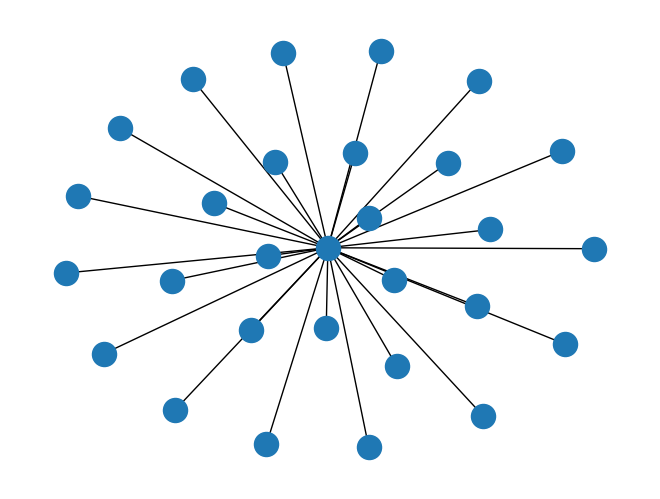

In [18]:
# import weighted edgelist in a network library

import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_weighted_edges_from(weighted_edges)

nx.draw(G, with_labels=False)

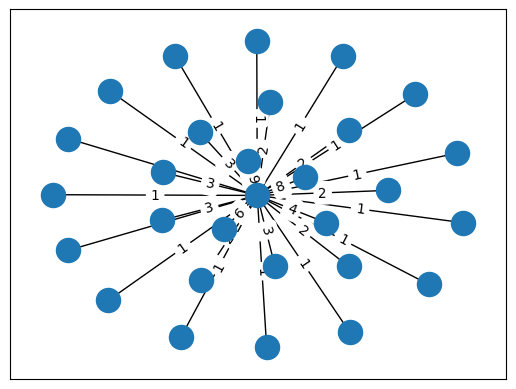

In [19]:
# draw a weighted plot

pos=nx.spring_layout(G)
nx.draw_networkx(G,pos, with_labels=False)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

## Exemplary analyses


Given the possibilities of what our approach, we want to conclude by giving two examples of what substantive questions we can answer. 
The first example is about chain citiation. Here, the question is whether there are typical chains, i.e., chains that occur more frequently. It is also interesting to see which references frequently occur together in a chain.
The second example is about the exact page references. We want to see if there are certain pages in decisions that are cited more often.

For this purpose we have prepared a small test data set. This contains references to the Nasauskiesungsbeschluss.

In [20]:
#import test df

test_data = pd.read_pickle("data/bverfge_test_data.pkl")
print(test_data.shape)
test_data.head()

(45, 4)


,source,datetime,ref,ref_len
1897,BVerfGE67_26,1984-04-18,"(BVerfGE 46, 268 [283], BVerfGE 58, 300 [317f.])",2
1944,BVerfGE68_361,1985-01-08,"(BVerfGE 52, 1 [27], BVerfGE 58, 300 [330 ff.])",2
2019,BVerfGE70_115,1985-06-04,"(BVerfGE 58, 300 [336])",1
2025,BVerfGE70_191,1985-06-19,"(BVerfGE 1, 264 [278], BVerfGE 58, 300 [335 f.])",2
2025,BVerfGE70_191,1985-06-19,"(BVerfGE 24, 367 [394], BVerfGE 38, 175 [180],...",6


### String Cocitation

First, we want to extract all string citations in which the Nasauskiesungsbeschluss is referred to. It turns out that there are chains that are used repeatedly.

In [21]:
cs_data = test_data.copy()
cs_data['ref_list'] = cs_data.ref.apply(lambda x: x.to_short_str())
cs_data[cs_data.ref_len > 1].ref_list.value_counts().head(10)

[BVerfGE52_1, BVerfGE58_300]                                                                3
[BVerfGE24_367, BVerfGE46_268, BVerfGE56_249, BVerfGE58_300]                                2
[BVerfGE31_275, BVerfGE58_300]                                                              2
[BVerfGE31_275, BVerfGE36_281, BVerfGE58_300]                                               2
[BVerfGE31_275, BVerfGE36_281, BVerfGE42_263, BVerfGE58_300]                                2
[BVerfGE42_263, BVerfGE58_300]                                                              2
[BVerfGE46_268, BVerfGE58_300]                                                              1
[BVerfGE10_89, BVerfGE58_300]                                                               1
[BVerfGE58_300, BVerfGE70_191, BVerfGE83_201, BVerfGE100_226]                               1
[BVerfGE52_1, BVerfGE58_137, BVerfGE58_300, BVerfGE70_191, BVerfGE72_66, BVerfGE100_226]    1
Name: ref_list, dtype: int64

Next, we want to know what other references are included in the string citations that also refer to the Nasauskiesung.

In [22]:
coref_test_data = cs_data[cs_data.ref_len > 1].explode('ref_list').reset_index()
coref_test_data = coref_test_data.drop(coref_test_data[coref_test_data.ref_list == "BVerfGE58_300"].index)
coref_test_data.ref_list.value_counts().to_frame().reset_index().rename(columns={'ref_list':'coditation',0:'n'}).head(10)

,index,coditation
0,BVerfGE52_1,7
1,BVerfGE31_275,6
2,BVerfGE42_263,5
3,BVerfGE36_281,4
4,BVerfGE46_268,3
5,BVerfGE70_191,3
6,BVerfGE100_226,3
7,BVerfGE24_367,3
8,BVerfGE63_1,2
9,BVerfGE72_66,2


#### Exact References

Lastly, it is about the exact place references. This has not yet been considered in research. However, it is interesting to know if specific passages in decisions receive special attention.
In the example below, we look at which passages of the Naßauskiesungsbeschluss are referenced.

In [23]:
page_data = test_data.explode('ref')
page_data['str'] = page_data.ref.apply(lambda x: x.to_short_str())
page_data = page_data[page_data['str'] == "BVerfGE58_300"]
page_data['page'] = page_data.ref.apply(lambda x: x.ref)
page_data['page_nr'] = page_data.ref.apply(lambda x: x.ref_clean)
page_data.head()

,source,datetime,ref,ref_len,str,page,page_nr
1897,BVerfGE67_26,1984-04-18,"BVerfGE 58, 300 [317f.]",2,BVerfGE58_300,317f.,317
1944,BVerfGE68_361,1985-01-08,"BVerfGE 58, 300 [330 ff.]",2,BVerfGE58_300,330 ff.,330
2019,BVerfGE70_115,1985-06-04,"BVerfGE 58, 300 [336]",1,BVerfGE58_300,336,336
2025,BVerfGE70_191,1985-06-19,"BVerfGE 58, 300 [335 f.]",2,BVerfGE58_300,335 f.,335
2025,BVerfGE70_191,1985-06-19,"BVerfGE 58, 300 [331]",6,BVerfGE58_300,331,331


In [24]:
page_data.page_nr.value_counts().to_frame().reset_index().rename(columns={'index':'page', 'page_nr':'n'}).head(10)

,page,n
0,351,8
1,330,5
2,317,4
3,335,4
4,320,3
5,336,3
6,353,3
7,352,2
8,338,2
9,318,2
